# EO-Lab tutorial

<div style="text-align: right"><i> Beginner </i></div>

***
<center><h1>Query and download of EnMAP data from the EOC Geoservice</h1></center>

***

This notebook provides information on how to programmatically access collections from the [EOC Geoservice - EOC EO Products Service STAC catalogue](https://geoservice.dlr.de/eoc/ogc/stac/v1/). For demonstration purposes, the [ENMAP_HSI_L2A](https://geoservice.dlr.de/eoc/ogc/stac/v1/collections/ENMAP_HSI_L2A) collection is used. 
We show an example workflow with a specific product asset (the spectral image COGtiff). This is meant to serve as an example, which you need to adapt to your respective requirements. 

<h3>Pre-requisites</h3>

A pre-requisite before using this notebook is a **user account on the EO-Lab platform** - go to the [EO-Lab website](https://eo-lab.org) and register (top right corner => login). 
Furthermore, please make sure to **create an organisation for your user in the profile manager** of EO-Lab. You can find instructions how to do so in this [article](https://eo-lab.org/en/portfolio/?id=6a018f0b-e6b4-405d-a357-e55f95aab626) (see section "Accessing EnMAP data")

To query the EOC Geoservice STAC catalogue, a registration is not required - this functionality is open for everyone. 
                                                                                                       
## What are we going to do: 
1. Querying the EOC Geoservice STAC catalogue to create a list of EnMAP files we want to download.
2. Log in on the EOC Geoserice UMS in the browser (only once) to retrieve a session cookie which will allow us to authenticate and authorize for further downloads.
3. Initiate a download of the created list of EnMAP files using curl. 

# Query the EOC Geoservice STAC-API 

The first step is to connect to the STAC-API and to querry the collection.
In this case we querry data that have the BoundingBox of the DLR Oberpfaffenhofen.

In [ ]:
# this step is only required once to install the library.
!pip install pystac_client

In [2]:
from pystac_client import Client

# this is the URL for the EOC Geoservice STAC catalogue
catalog = Client.open("https://geoservice.dlr.de/eoc/ogc/stac/v1/")
collections = ["SUPERSITES"]

# set bounding box
#bbox = [11.230259, 48.051808, 11.337891, 48.117059] #DLR Oberpfaffenhofen
bbox = [-180, -90, 180, 90] # bbox for whole world

# alternatively: set date / time window
#datetime = ("2024-06-30T00:00:00Z/2024-06-30T23:59:59Z")

search = catalog.search(collections= collections, bbox= bbox)
#search = catalog.search(collections= collections, datetime = datetime)

print("{} files found".format(search.matched()))
print()
items = search.item_collection()

print("An example item looks like this:")
print()
print(items[1])

5642 files found

An example item looks like this:

<Item id=C569_N125_D_SM_strip_006_R_2024-07-31T07:50:01.986000Z>


# Downloading the EnMAP files to a specified directory

To download data from EOC Geoservice using an approach with curl, one has to first **get the session cookie from the EOC Geoservice UMS**. The easiest way is to log on to the EOC Geoservice UMS using the Browser.

- In this case we go to the Geoservice [EnMAP L2A Download page](https://geoservice.dlr.de/eoc/ogc/stac/v1/collections/ENMAP_HSI_L2A). We will be reconnected to the UMS (see Image 1).
- **Before** entering the login **credentials of your EO-Lab account (top right, choose "External Identity Providers EO-LAB")**, open the "Web Developer Tool" (Firefox: F12 or using settings) and switch to the "Network" Context.
- Now enter the credentials and login. There will be a **GET-request (see Image 2) to download.geoservice.dlr.de with the file name** that was accessed, this request contains the Session-Cookie that we need.
- **We can just right click on the GET-request and under "Copy Value" choose "Copy as cURL"**. With this copied cURL-command we can just run the same download again, but from the command line.
- **Please note:**
  - Below we give an example from our browser. **Make sure to create this curl command yourself, otherwise it will not work for you!**
  - **Session cookies expire over time**. So for downloades that take longer, you may have to repeat this procedure - make a new request in the browser, thereby create a new session to get a new cookie (and curl command).
- To start a additional download, just exchange the URL that is used in the command.

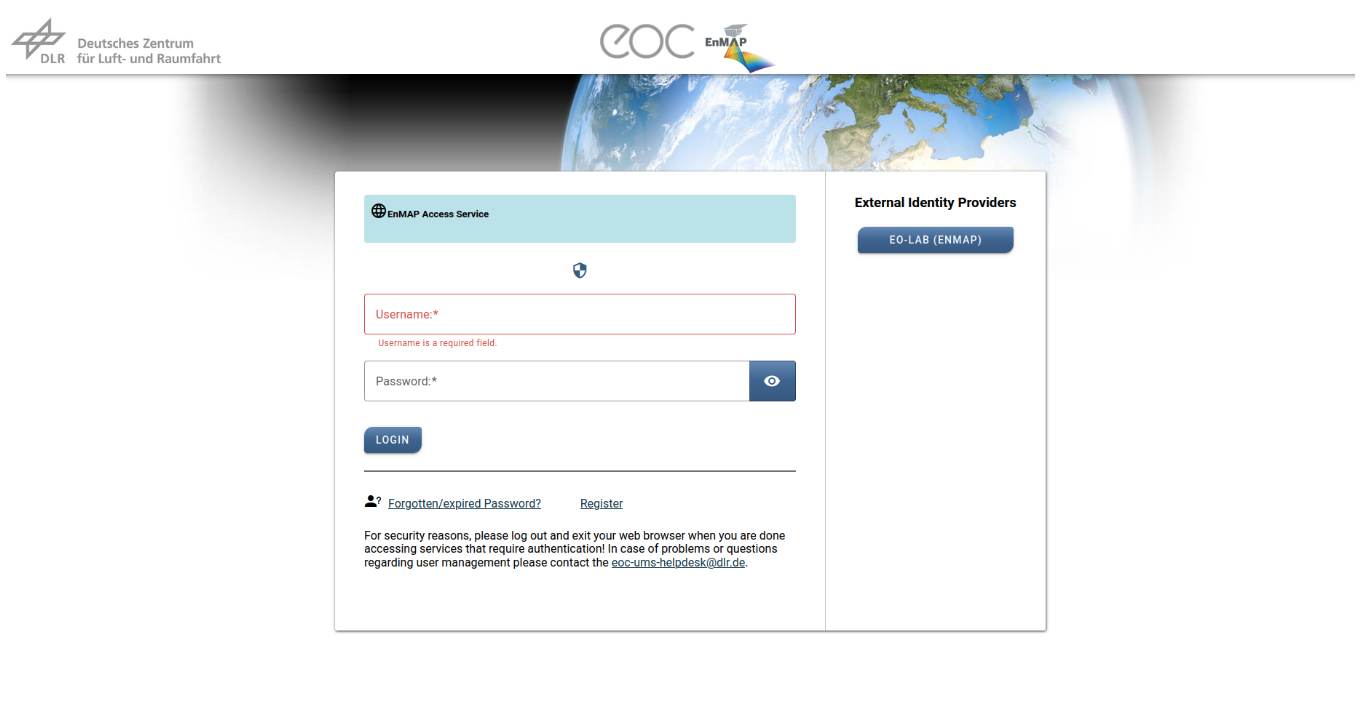
*Image 1: UMS Login Page*



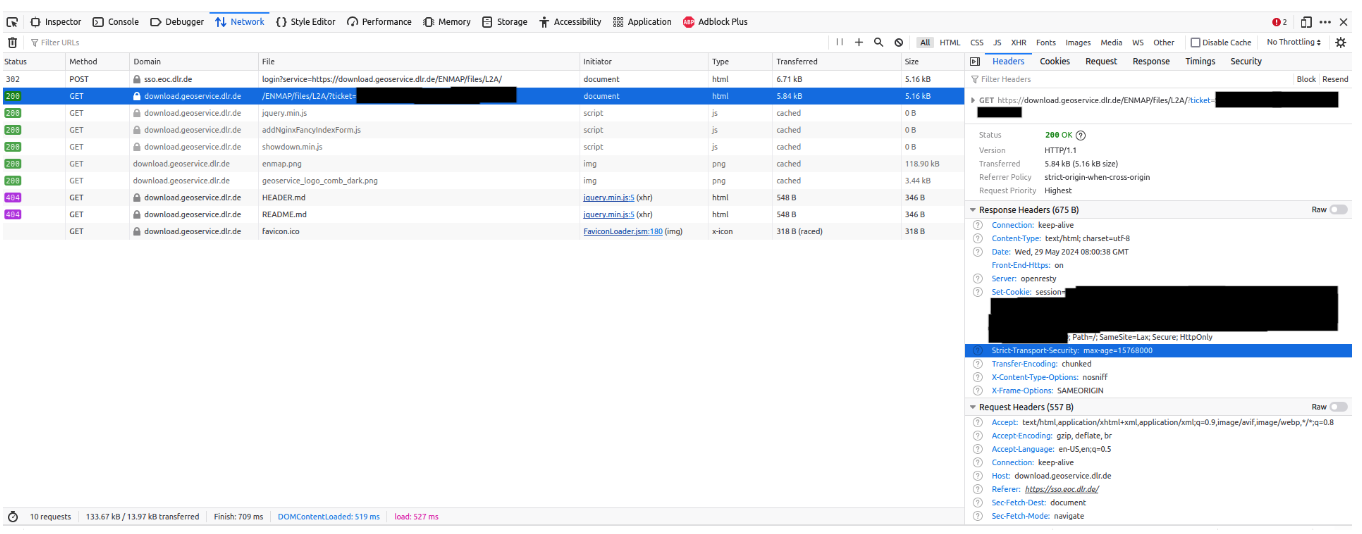
*Image 2: Session Cookies in the "Web Developer Tool"*

## An example curl command
we use an **example curl command** copied from the browser and save it in a variable to use it later:

In [1]:
# an example curl command 

curl_cmd = """
curl 'https://download.geoservice.dlr.de/ENMAP/files/L2A/2024/02/14/DT0000061179/03/ENMAP01-____L2A-DT0000061179_20240214T084903Z_003_V010401_20240222T003432Z-SPECTRAL_IMAGE_COG.TIF' \
  -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7' \
  -H 'Accept-Language: en-GB,en;q=0.9,de-AT;q=0.8,de;q=0.7' \
  -H 'Connection: keep-alive' \
  -H 'Cookie: session====COOKIE====' \
  -H 'Referer: https://download.geoservice.dlr.de/ENMAP/files/L2A/2024/02/14/DT0000061179/03/' \
  -H 'Sec-Fetch-Dest: document' \
  -H 'Sec-Fetch-Mode: navigate' \
  -H 'Sec-Fetch-Site: same-origin' \
  -H 'Sec-Fetch-User: ?1' \
  -H 'Upgrade-Insecure-Requests: 1' \
  -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36' \
  -H 'sec-ch-ua: "Not/A)Brand";v="8", "Chromium";v="126", "Google Chrome";v="126"' \
  -H 'sec-ch-ua-mobile: ?0' \
  -H 'sec-ch-ua-platform: "macOS"' """

Next we need to **prepare the curl command** so that we can replace the necessary parts for each file we want to download:

In [ ]:
# replace the URL in the curl command for each file in our pre-generated list
curl_parts = curl_cmd.split(' ')
old_url = curl_parts[1][1:-1]

Then we **create a download directory** to store the EnMAP files - in case it does not yet exist:

In [ ]:
# create a new download directory 
import os

# Get the current working directory
current_directory = os.getcwd()

print(f"The current working directory is: {current_directory}")

# Define the directory path relative to the current working directory
relative_directory = "EnMAP_downloads"
target_directory = os.path.join(current_directory, relative_directory)

# Create the directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)
    print(f"Directory created at: {target_directory}")
else:
    print(f"Directory already exists at: {target_directory}")

## Downloading the files
After we created the list of items we want to download, we need to **construct the download paths (URLs)** for each file. Every EnMAP filename contains everything we need to do so. 

This is how an example of an EnMAP COG-tiff product URL looks like:

https://download.geoservice.dlr.de/ENMAP/files/L2A/2024/07/05/DT0000082480/06/ENMAP01-____L2A-DT0000082480_20240705T084927Z_006_V010402_20240707T172248Z-SPECTRAL_IMAGE_COG.TIF

The variable items are year, month, day, then a data take information, and a tileID followed by the respective filename, which contains all the aforementioned information. So we can build the URL from each filename, as in the following function: 


In [ ]:
# set the base URL for downloading from this source
base_url = "https://download.geoservice.dlr.de/ENMAP/files"
# download the spectral image COGs. in case you wanted to download different assets from a product, 
# you need to adapt this part of the code to match the respective filename!
asset_type = "-SPECTRAL_IMAGE_COG.TIF"

# Function to construct to URLs from the filenames
def construct_url(item):
    # Split the filename to extract parts
    parts = item.split('_')
    # Extract the filename
    filename = item[9:-1]
    file = f"{filename}{asset_type}"
    # Extract the acquisition date (YYYYMMDD format)
    acquisition_date = parts[5][:8]
    year = acquisition_date[:4]
    month = acquisition_date[4:6]
    day = acquisition_date[6:8]
    # Extract the DT number
    dt_number = parts[4].split('-')[-1]
    # Extract the tileID 
    tile_ID = parts[6][1:3]
    # Construct the URL
    url = f"{base_url}/L2A/{year}/{month}/{day}/{dt_number}/{tile_ID}/{file}"
    return url, file



After we created this function, we can use it to **download each file in our list, one after the other**:

In [ ]:
# for demonstration purposes, we download only the first 2 items of the list we created. 
for item in items[0:2]:
    url, file = construct_url(str(item))
    print("Downloading file: ")
    print(url)
    print("to filename:" )
    print(file)
    print("***")
    print()
    # download the file
    new_curl_cmd = curl_cmd.replace(old_url,url)

    # Use curl to download the file
    !curl {new_curl_cmd} --output {target_directory}/{file}
    print(f"File downloaded: {target_directory}/{file}")
    print()